WORKFLOW -->

Heart Data --> Data Pre-processing --> Train test split --> Logistic Regression model --> Train the Data --> Test the Data.

Test with some data Whether heart is healthy or not.

#######################START######################

Importing The Dependencies -->

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Data Collection and Preprocessing -->

In [37]:
df = pd.read_csv("/content/heart_disease_data.csv")

In [38]:
df.shape

(303, 14)

In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
pd.isnull(df)
  # checking for null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
pd.isnull(df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
  # if null value occur than drop null rows it drop that rows
  # df.dropna(inplace=True)

In [45]:
  # change data type
  # df['target']=df['target'].astype('int')
  # checking data typr
  # df['target'].dtype

In [46]:
  # describe() returns description of data in the dataframe
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [48]:

# df['sex'][df['sex'] == 0] = 'female'
# df['sex'][df['sex'] == 1] = 'male'

# df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
# df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
# df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
# df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

# df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
# df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

# df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
# df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
# df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
# df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

# df['st_slope'][df['st_slope'] == 1] = 'upsloping'
# df['st_slope'][df['st_slope'] == 2] = 'flat'
# df['st_slope'][df['st_slope'] == 3] = 'downsloping'

# df['thalassemia'][df['thalassemia'] == 1] = 'normal'
# df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
# df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [49]:
# Age: displays the age of the individual.
# Sex: displays the gender of the individual using the following format :
# 1 = male
# 0 = female
# Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
# 1 = typical angina
# 2 = atypical angina
# 3 = non — anginal pain
# 4 = asymptotic
# Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
# Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
# Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
# If fasting blood sugar > 120mg/dl then : 1 (true)
# else : 0 (false)
# Resting ECG : displays resting electrocardiographic results
# 0 = normal
# 1 = having ST-T wave abnormality
# 2 = left ventricular hyperthrophy
# Max heart rate achieved : displays the max heart rate achieved by an individual.
# Exercise induced angina :
# 1 = yes
# 0 = no
# ST depression induced by exercise relative to rest: displays the value which is an integer or float.
# Peak exercise ST segment :
# 1 = upsloping
# 2 = flat
# 3 = downsloping
# Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
# Thal : displays the thalassemia :
# 3 = normal
# 6 = fixed defect
# 7 = reversible defect
# Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
# 0 = absence
# 1, 2, 3, 4 = present.

1 --> Defective Heart

0 --> Healthy Heart

In [50]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

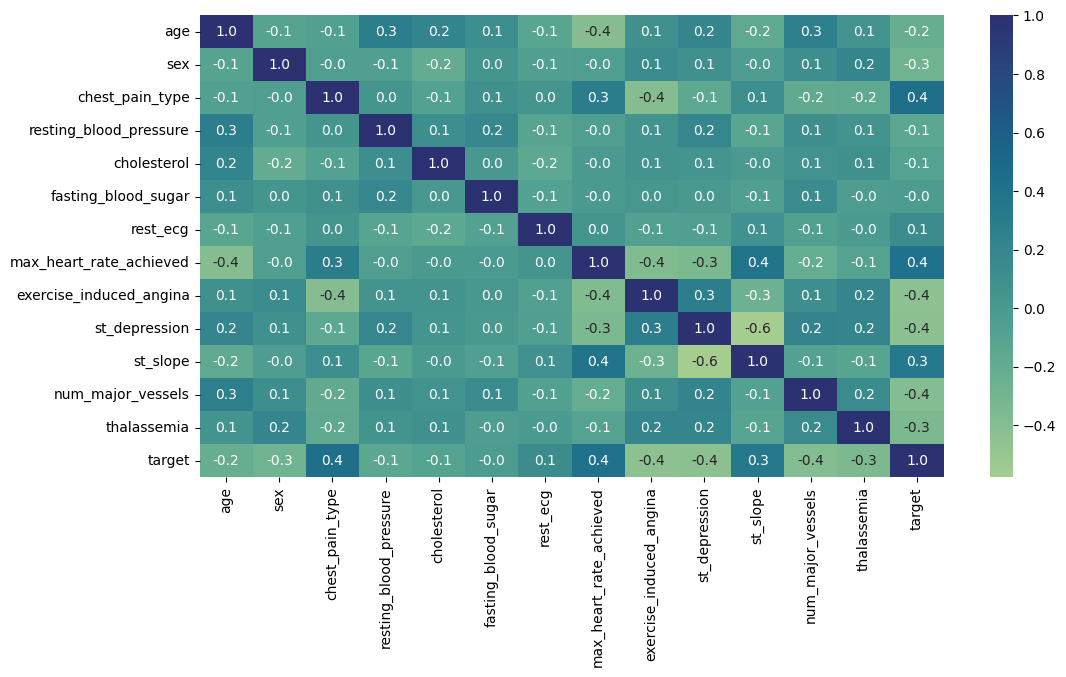

In [51]:
corr = df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, fmt = '.1f', cmap = 'crest')

In [52]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Splitting the features and the target

In [53]:
x = df.drop(columns = ['target'])
y = df.target

In [54]:
print(x)

     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
298   57    0                0                     140          241   
299   45    1                3                     110          264   
300   68    1                0                     144          193   
301   57    1                0                     130          131   
302   57    0                1                     130          236   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                      1         0                      150   
1                    

In [55]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into training data and test data

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state=2)

In [57]:
print(x.shape , x_train.shape , x_test.shape)

(303, 13) (272, 13) (31, 13)


Model Training

Logistic Regression -->

In [58]:
model1 = make_pipeline(
    LogisticRegression()
)
model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression())])

Model Evaluation -->

In [59]:
model1.score(x_test, y_test)

0.9354838709677419

Accuracy Score -->

In [60]:
# accuracy score on training data
x_train_predict = model1.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict,y_train)

In [61]:
print('accuracy on training data : ',training_data_accuracy)

accuracy on training data :  0.8382352941176471


In [62]:
# accuracy score on test data
x_test_predict = model1.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict,y_test)

In [63]:
print('accuracy on test data : ',test_data_accuracy)

accuracy on test data :  0.9354838709677419


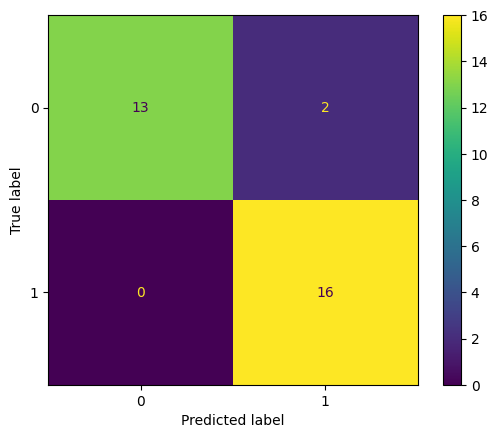

In [64]:
ConfusionMatrixDisplay.from_estimator(model1, x_test, y_test)

In [65]:
probabilities = model1.predict_proba (x_test) [:, 1]
default_predictions =(probabilities >= 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5):")
print(default_cm)
#Adjust threshold to 0.8
adjusted_threshold = 0.8
adjusted_predictions= (probabilities >= adjusted_threshold).astype(int)
adjusted_cm= confusion_matrix(y_test, adjusted_predictions)
print("InConfusion Matrix (Adjusted Threshold 0.8):")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5):
[[13  2]
 [ 0 16]]
InConfusion Matrix (Adjusted Threshold 0.8):
[[15  0]
 [ 6 10]]


Building a Predictive System -->



In [66]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# change the input data into numpy array

array = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = array.reshape(1,-1)
prediction = model1.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')


[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
import pickle

In [68]:
filename = 'trained_model.sav'
pickle.dump(model1, open(filename,'wb'))

In [71]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [72]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# change the input data into numpy array

array = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = array.reshape(1,-1)
prediction = loaded_model .predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')


[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
